In [27]:
import matplotlib.pyplot as plt

def plot_xyz(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(x,y,z)
    ax.set_aspect('equal','box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax, fig

In [23]:
import csv
from typing import Iterable

def save_cloud(filepath:str, data:Iterable):
    with open(filepath, 'w', newline='') as fp:
        wr = csv.writer(fp)
        wr.writerows(data)

In [37]:
from typing import Literal
from scipy.stats import norm, uniform

PLANES = Literal['x', 'y', 'z']

def create_plane(size:float, plane:PLANES, n_points:int=1000, spread:float=0.05):
    # create a plane perpendicular to specified axis, symmetrical around it
    if plane == 'x':
        x = uniform.rvs(size=n_points, loc=-spread/2, scale=spread)
        y = uniform.rvs(size=n_points, loc=-size/2, scale=size)
        z = uniform.rvs(size=n_points, loc=-size/2, scale=size)
    elif plane == 'y':
        x = uniform.rvs(size=n_points, loc=-size/2, scale=size)
        y = uniform.rvs(size=n_points, loc=-spread/2, scale=spread)
        z = uniform.rvs(size=n_points, loc=-size/2, scale=size)
    else:
        x = uniform.rvs(size=n_points, loc=-size/2, scale=size)
        y = uniform.rvs(size=n_points, loc=-size/2, scale=size)
        z = uniform.rvs(size=n_points, loc=-spread/2, scale=spread)
    return x,y,z

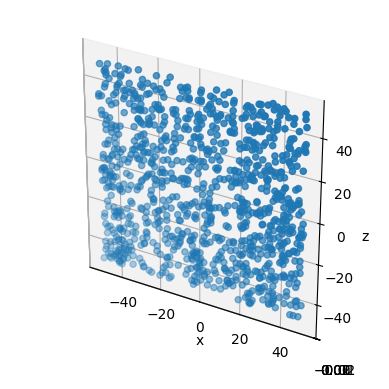

In [40]:
plane = 'y'
x,y,z = create_plane(100,plane,1000)
ax,fig = plot_xyz(x,y,z)
# ax.view_init(elev=90, azim=-90, roll=0)
save_cloud(f'../clouds/{plane}_plane.xyz', zip(x,y,z))

In [ ]:
import math
import numpy as np

def create_cylinder(radius, height, n_points=1000, spread=0.05):
    # uniform points in polar coordinates
    theta = uniform.rvs(size=n_points, loc=0, scale=2*math.pi) # pi*d
    r = uniform.rvs(size=n_points, loc=radius, scale=0.05)

    x = np.cos(theta) * r
    y = np.sin(theta) * r
    z = uniform.rvs(size=n_points, loc=-height/2, scale=height)
    return x,y,z

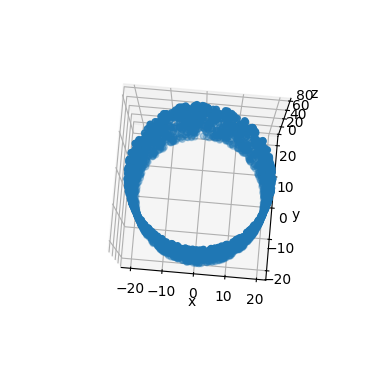

In [36]:
radius = 20
height = 80
n_points = 2000

x,y,z = create_cylinder(radius,height,n_points)

ax,fig = plot_xyz(x,y,z)
ax.view_init(elev=85, azim=-85, roll=0)

save_cloud(f'../clouds/cylinder.xyz', zip(x,y,z))